In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 트레인 데이터셋 보기

In [2]:
# 트레인 데이터셋 읽는다.
df_train = pd.read_csv('./data/train.csv', encoding='utf-8')

# 테스트 데이터셋 읽는다.
df_test =pd.read_csv('./data/test.csv', encoding='utf-8')

df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [3]:
df_test.head(10)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
5,8,y,aa,ai,e,d,x,g,s,0,...,1,0,0,0,0,0,0,0,0,0
6,10,x,b,ae,d,d,x,d,y,0,...,0,0,0,0,0,1,0,0,0,0
7,11,f,s,ae,c,d,h,d,a,0,...,0,0,1,0,0,0,0,0,0,0
8,12,ap,l,s,c,d,h,j,n,0,...,0,0,0,0,0,0,0,0,0,0
9,14,o,v,as,f,d,g,f,v,0,...,0,0,0,0,0,0,0,0,0,0




#### 트레인 데이터셋에서 라벨 y 에 대한 분석

In [4]:
# train.csv의  y애트리뷰트에 대한 분석
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

#### 트레인 데이터 튜플의 y컬럼들을 히스토그램으로 시각화

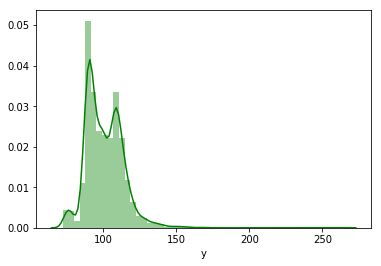

In [5]:
sns.distplot(df_train['y'], color='green')

In [6]:
# skewness ( 왜곡) 확인
print('Skewness: %f' %df_train['y'].skew() )

Skewness: 1.206526


In [7]:
# kurtosis(첨도)
print('Kurtosis: %f' %df_train['y'].kurt())

Kurtosis: 7.910713


개인적으로 첨도가 무얼의미하는지 모르겠음..ㅠ

###  <트레인 데이터셋>

Degree (attribute 개수): 378개
- float64 타입 컬럼: 1개 => y 컬럼
- object(string) 타입 컬럼: 8개 => X0,X1,X2,X3,X4,X5,X6,X8
- int 64 타입 컬럼: 369개 => 위의 9개 컬럼을 제외한 나머지..(ID, X10~X385) 
- ID 컬럼을 제외한 나머지는 Binary(0,1) 이다.

In [8]:
# df_train 의 정보를 확인한다.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
df_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
X3       object
X4       object
X5       object
X6       object
X8       object
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
X24       int64
X26       int64
X27       int64
X28       int64
X29       int64
X30       int64
         ...   
X355      int64
X356      int64
X357      int64
X358      int64
X359      int64
X360      int64
X361      int64
X362      int64
X363      int64
X364      int64
X365      int64
X366      int64
X367      int64
X368      int64
X369      int64
X370      int64
X371      int64
X372      int64
X373      int64
X374      int64
X375      int64
X376      int64
X377      int64
X378      int64
X379      int64
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: obje

In [10]:
# train 데이터셋에 null 데이터 개수 카운트
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

## Seaborn-Countplot 이용: y컬럼과 관련된 컬럼들에 대한 조사..

## 1. X0

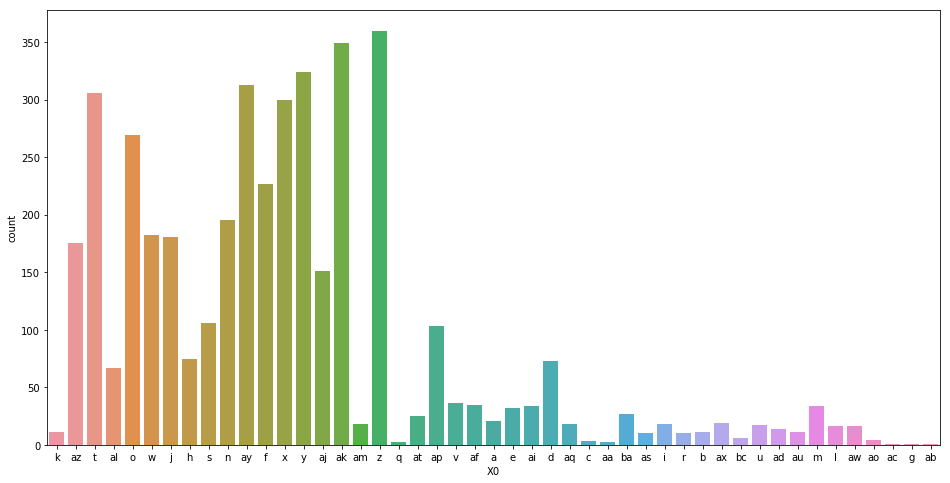

In [11]:
# X0
plt.figure(figsize=(16,8))
g= sns.countplot(x='X0', data=df_train)

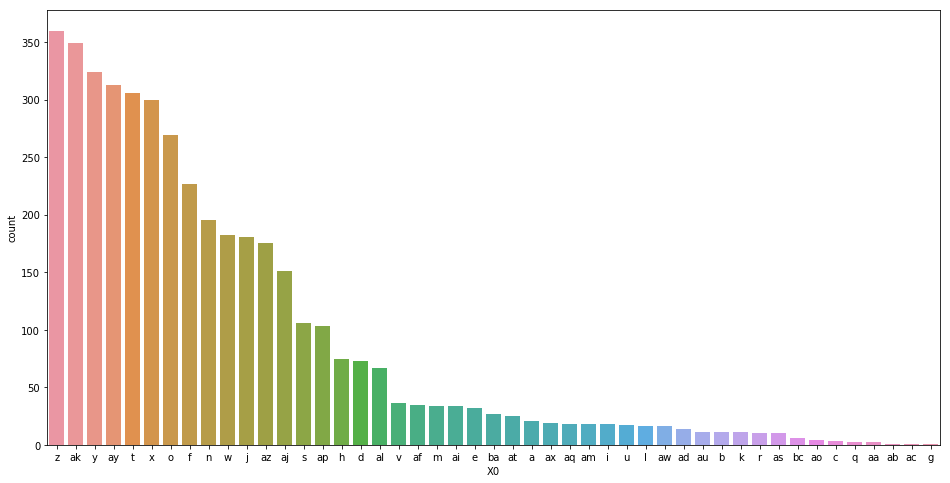

In [12]:
#  모든 튜플들의 X0컬럼에 해당하는 값을 내림차순 정렬을 시켜본다.
plt.figure(figsize=(16,8))
sns.countplot(x= 'X0', data=df_train, 
                      order=df_train['X0'].value_counts().index )

## 2. X1

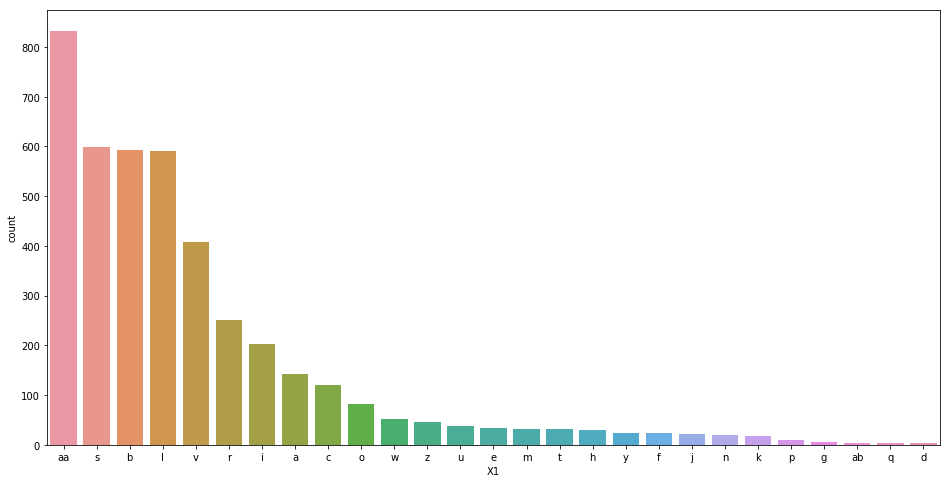

In [13]:
# X1
#  모든 튜플들의 X1컬럼에 해당하는 값을 내림차순 정렬을 시켜본다.
plt.figure(figsize=(16,8))
sns.countplot(x= 'X1', data=df_train, 
                      order=df_train['X1'].value_counts().index )

##  3. X2

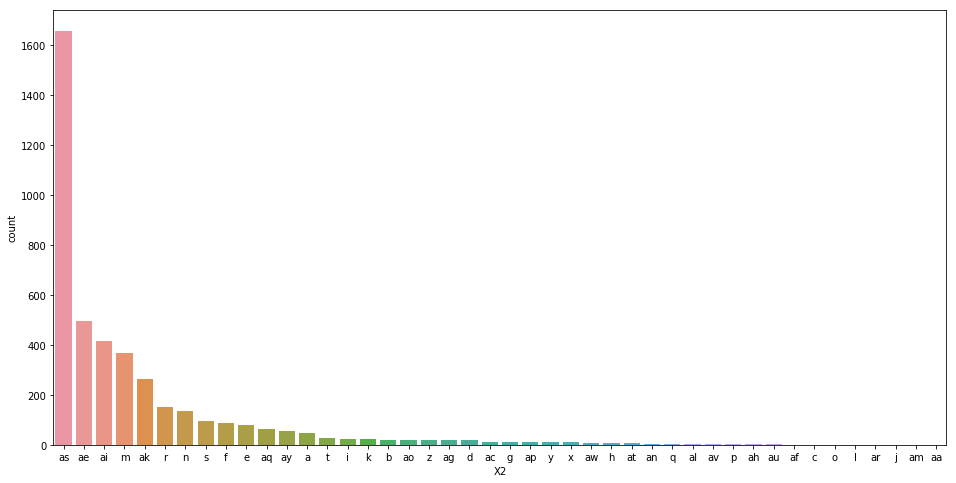

In [14]:
# X2
#  모든 튜플들의 X2컬럼에 해당하는 값을 내림차순 정렬을 시켜본다.
plt.figure(figsize=(16,8))
sns.countplot(x= 'X2', data=df_train, 
                      order=df_train['X2'].value_counts().index )

## 4. X3

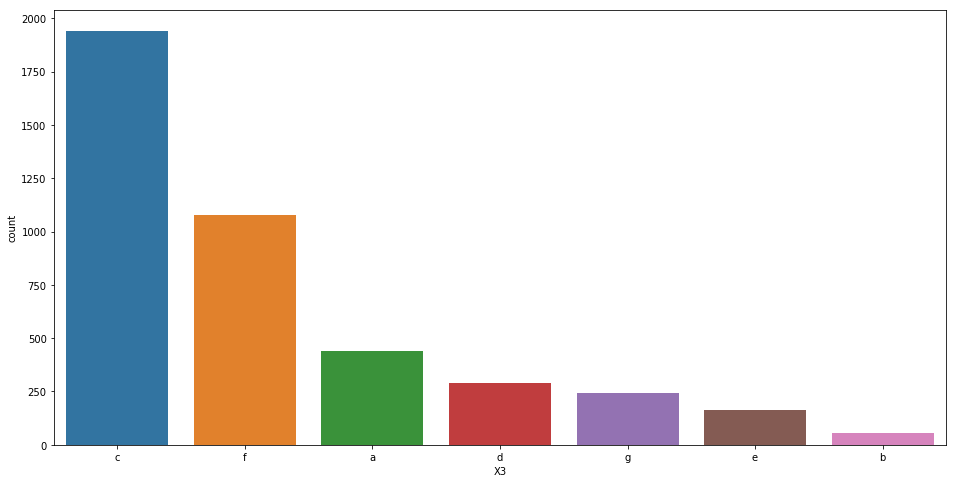

In [15]:
# X3
#  모든 튜플들의 X3컬럼에 해당하는 값을 내림차순 정렬을 시켜본다.
plt.figure(figsize=(16,8))
sns.countplot(x= 'X3', data=df_train, 
                      order=df_train['X3'].value_counts().index )

## 5. X4

- train 데이터셋의 튜플의 X4 속성(애트리뷰트)에 해당하는 값이 모두 d 처럼 보이겠지만
- b,c,a 를 갖는 데이터가 d를 갖는 데이터의 수보다 상당히 적기때문에 d만 있는것처럼 보인다.

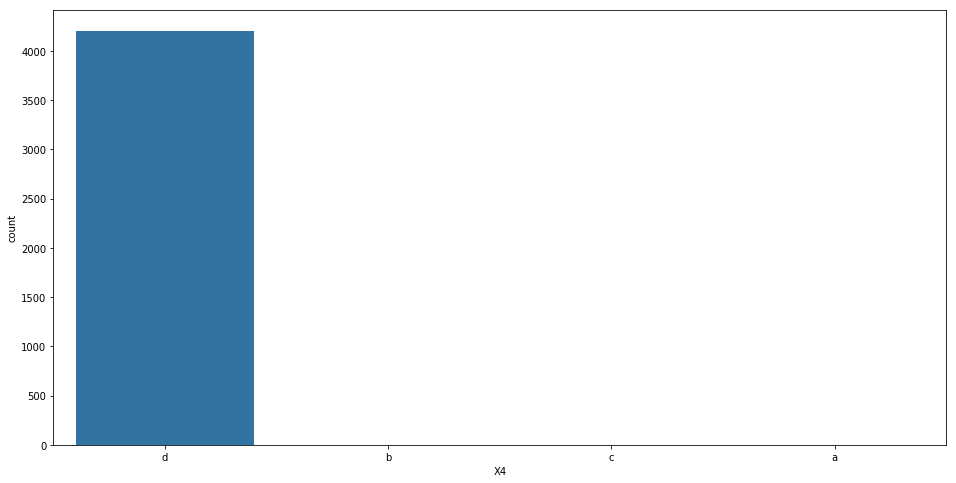

In [16]:
plt.figure(figsize=(16,8))
g=sns.countplot(x='X4', data=df_train)

In [17]:
# 중복되는 값들의 개수를 카운트
df_train['X4'].drop_duplicates().values

array(['d', 'b', 'c', 'a'], dtype=object)

## 6. X5

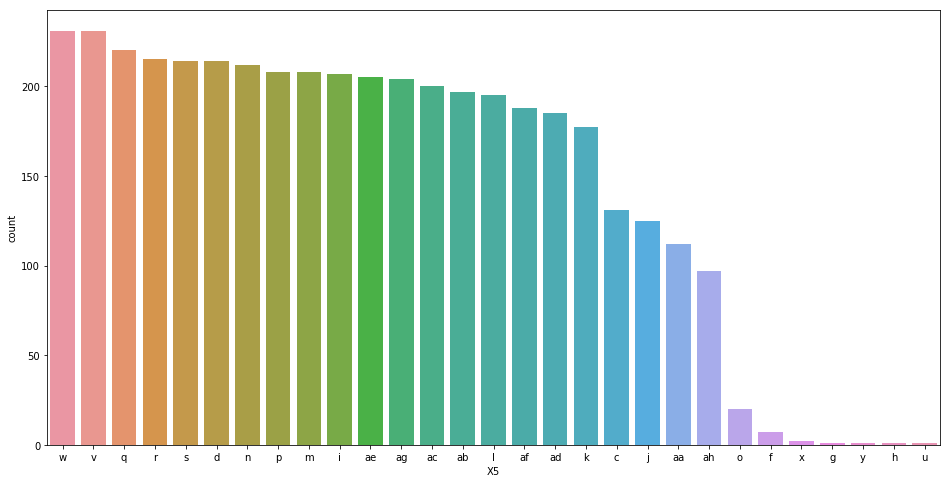

In [18]:
# X5
#  모든 튜플들의 X5컬럼에 해당하는 값을 내림차순 정렬을 시켜본다.
plt.figure(figsize=(16,8))
sns.countplot(x= 'X5', data=df_train, 
                      order=df_train['X5'].value_counts().index )

## 7. X6

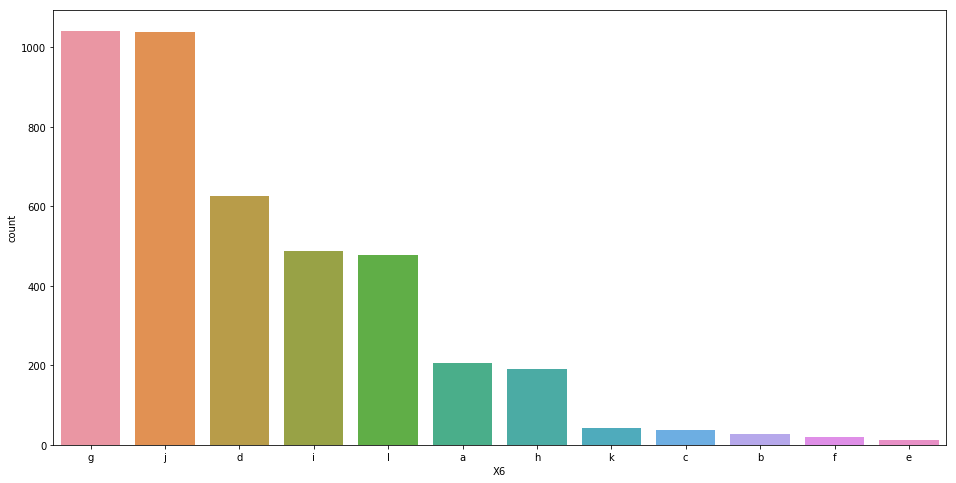

In [19]:
# X6
#  모든 튜플들의 X6컬럼에 해당하는 값을 내림차순 정렬을 시켜본다.
plt.figure(figsize=(16,8))
sns.countplot(x= 'X6', data=df_train, 
                      order=df_train['X6'].value_counts().index )

## 8. X8

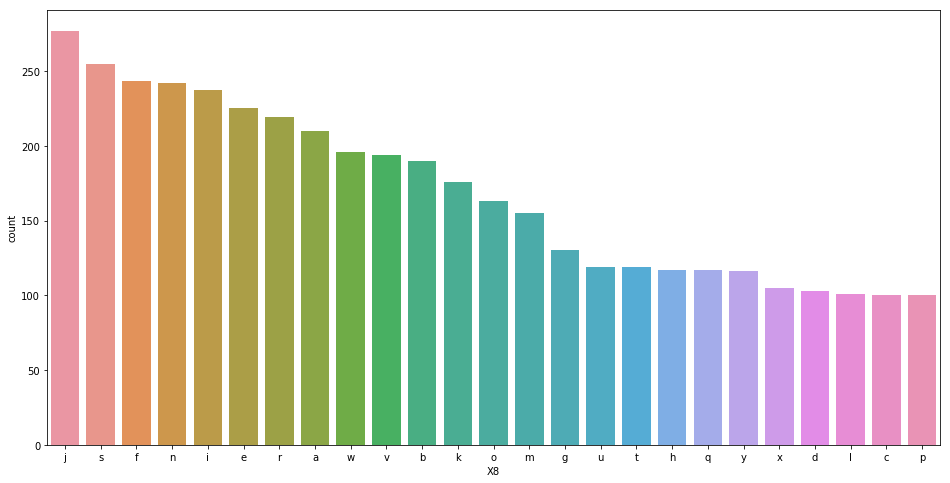

In [20]:
# X8
#  모든 튜플들의 X8컬럼에 해당하는 값을 내림차순 정렬을 시켜본다.
plt.figure(figsize=(16,8))
sns.countplot(x= 'X8', data=df_train, 
                      order=df_train['X8'].value_counts().index )


### 한 튜플당.. X10 ~ X385 컬럼 값의 합을 구한다.

- axis=0 : 열연산
- axis=1 : 행연산

In [21]:
sum_axis0= df_train.loc[:, 'X10': ].sum()
sum_axis0.head()

X10      56
X11       0
X12     316
X13     244
X14    1802
dtype: int64

In [22]:
sum_axis1= df_train.loc[:, 'X10':].sum(axis=1)
sum_axis1.head()

0    52
1    52
2    73
3    62
4    58
dtype: int64

In [23]:
X10_TO_X385= df_train.loc[ : ,'X10':].sum(axis=1) 
X10_TO_X385

0       52
1       52
2       73
3       62
4       58
5       53
6       53
7       62
8       70
9       63
10      45
11      52
12      64
13      52
14      65
15      52
16      52
17      43
18      62
19      54
20      63
21      53
22      52
23      58
24      54
25      61
26      57
27      55
28      65
29      58
        ..
4179    47
4180    60
4181    61
4182    60
4183    54
4184    64
4185    46
4186    59
4187    57
4188    72
4189    65
4190    57
4191    60
4192    58
4193    59
4194    58
4195    58
4196    43
4197    60
4198    51
4199    52
4200    55
4201    51
4202    60
4203    75
4204    65
4205    45
4206    62
4207    41
4208    55
Length: 4209, dtype: int64

In [24]:
max(X10_TO_X385)

94

## < X0, X1, X2, X3, X5, X6, X8 과 y의 관계 시각화 >

### 1. X0와 y의 관계

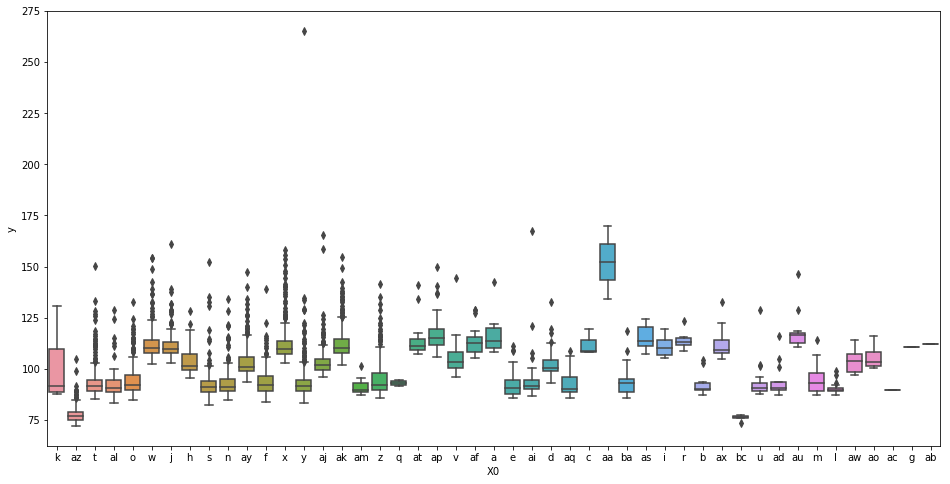

In [25]:
var= 'X0'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

### 2. X1와 y의 관계

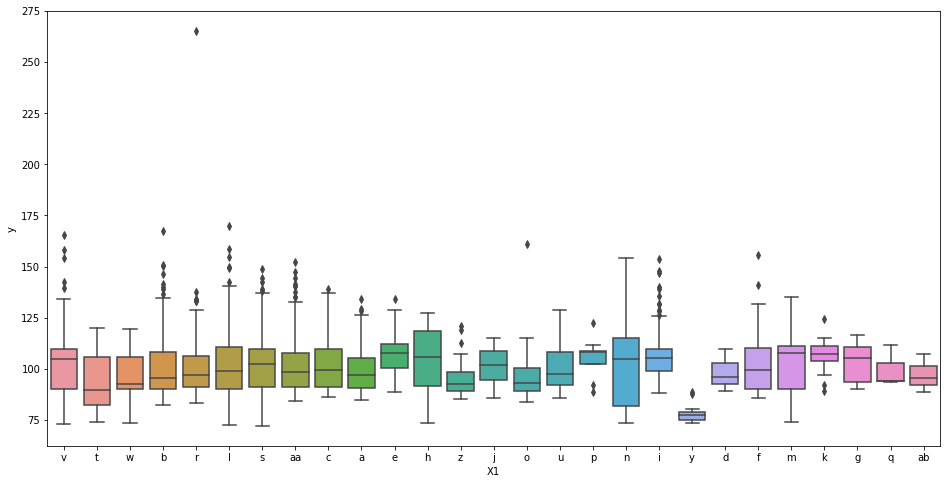

In [26]:
var= 'X1'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

### 3. X2와 y의 관계

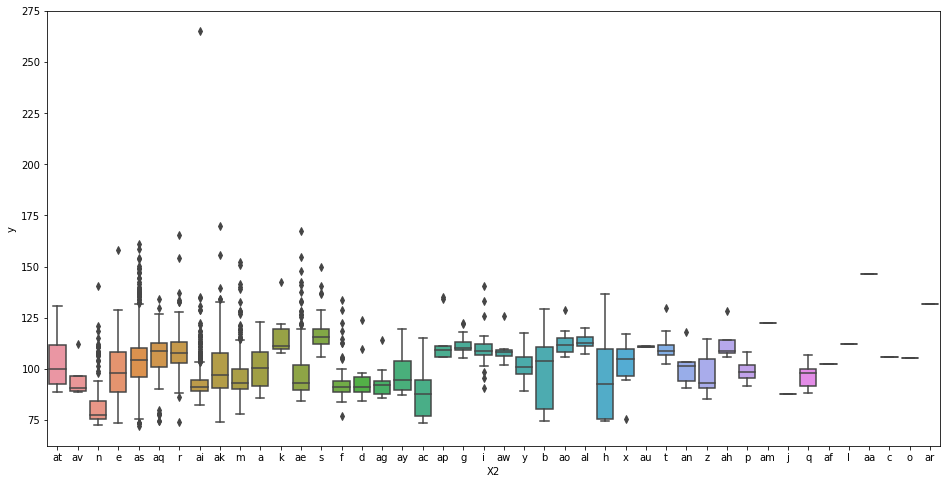

In [27]:
var= 'X2'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

### 4. X3와 y의 관계

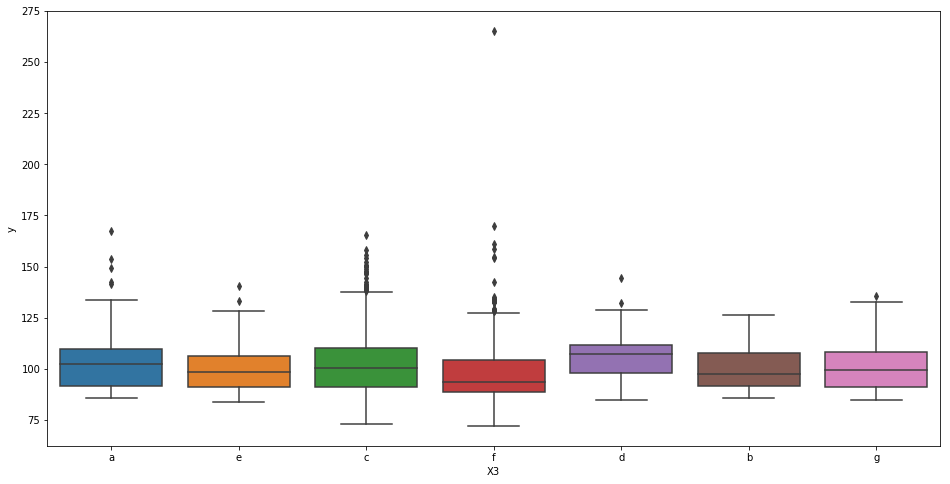

In [28]:
var= 'X3'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

### 5. X4와 y의 관계

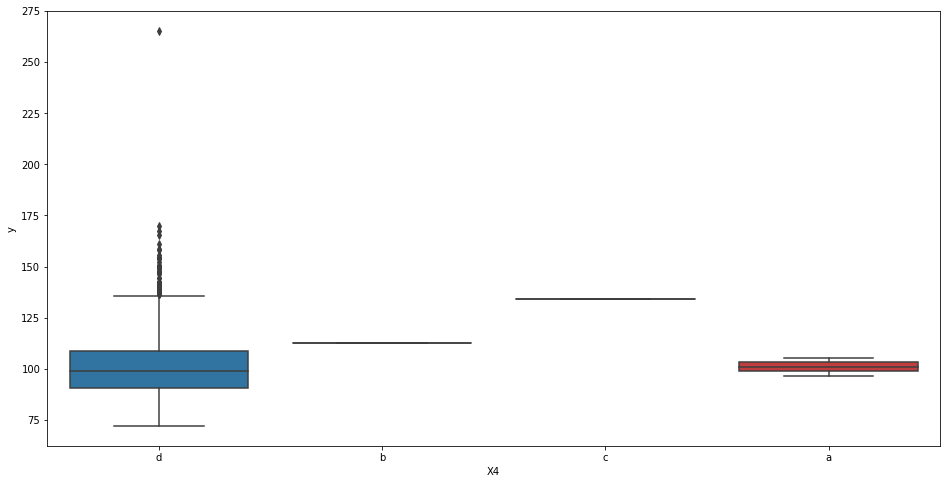

In [29]:
var= 'X4'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

### 6. X5와 y의 관계

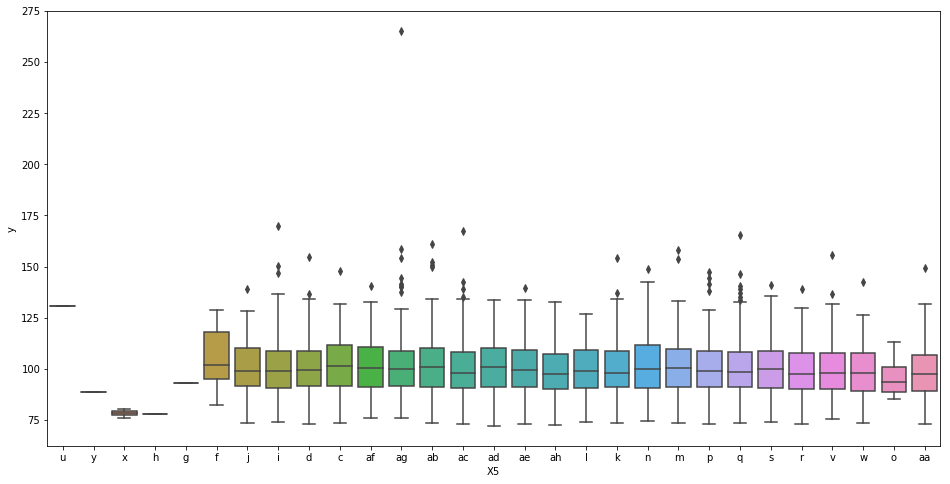

In [30]:
var= 'X5'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

### 7. X6와 y의 관계

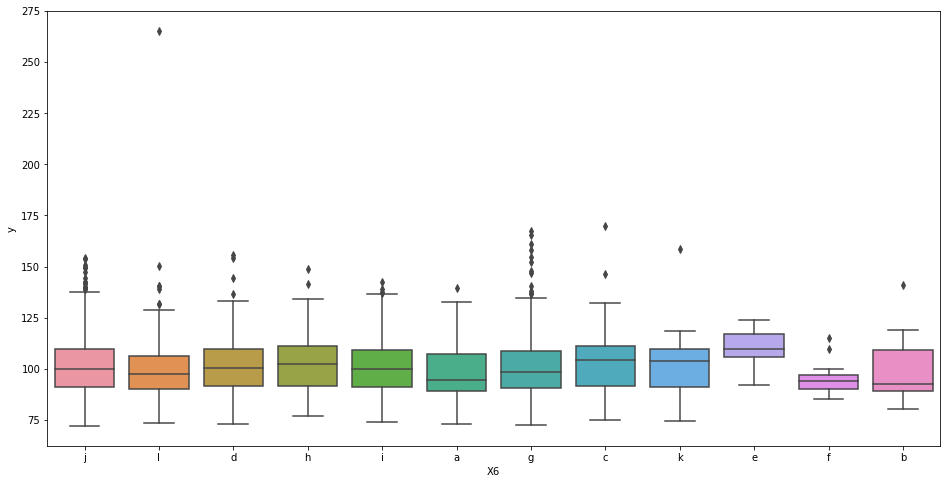

In [31]:
var= 'X6'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

### 8. X8와 y의 관계

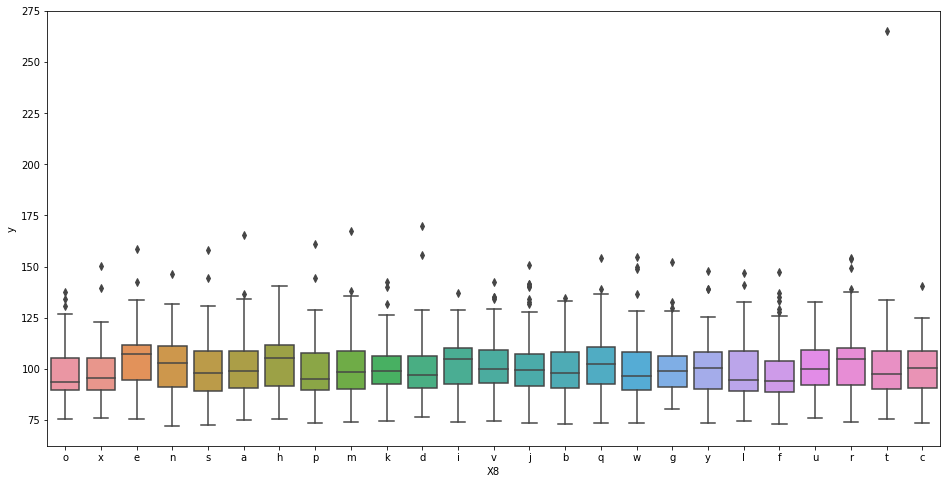

In [32]:
var= 'X8'
data = pd.concat( [ df_train['y'], df_train[var] ], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig= sns.boxplot(x=var, y='y', data=data)

## < X10 ~ X385 컬럼으로 선형회귀를 이용해보기 >

In [33]:
from sklearn.linear_model import LinearRegression

## train 데이터셋으로 학습모델 만들기

### (1) train 데이터셋의 Binary 타입 컬럼에 해당하는 데이터만 수집.

In [135]:
X_train=df_train.loc[:, 'X10': ]
X_train.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X_train.shape

(4209, 368)

### (2) train 데이터셋의 y레이블에 해당하는 데이터만 수집

In [136]:
y_train= df_train.loc[:, 'y'] # 실제 y레이블
y_train.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [128]:
y_train.shape

(4209,)

In [137]:
# 훈련데이터셋 전체 사용: linear- regression 훈련 모델 만들기.
model = LinearRegression().fit(X_train, y_train)

# coef 속성 => 가중치(w)와 계수(coefficient)가 저장( 추정된 가중치 벡터)
print('(1) linear_training.coef\n {}'.format(linear_model.coef_))
print('\n shape: {}'.format(linear_model.coef_.shape))

# intercept : 편향(offset), 절편(intercept) 파라미터가 저장.. (추정된 상수항)
print('\n\n(2) linear_training.intercept: {}'.format(linear_model.intercept_))

(1) linear_training.coef
 [-1.38370333e+13  1.38319476e+13 -1.38370333e+13  1.33949687e+13
 -1.38370333e+13  1.69826155e+13 -1.38370333e+13  6.26054138e+13
 -1.38370333e+13 -1.38370333e+13 -1.38370333e+13  7.93351866e+12
 -1.38370333e+13 -1.38370333e+13 -2.34766923e+13 -1.38370333e+13
 -2.59765625e-01 -1.38370333e+13  5.47781627e+13 -1.38370333e+13
  6.02096087e+12 -1.38370333e+13  1.11267091e+13 -1.38370333e+13
 -1.83674994e+13 -1.38370333e+13  1.23465385e+13 -1.72326660e+00
 -1.11267091e+13  4.68298552e+12  4.68298552e+12  2.11352539e+00
 -6.29882812e-01  1.18478632e+13 -5.21679688e+00  3.57421875e-01
  5.90563965e+00 -2.09122076e+13  3.71484375e+00 -2.05078125e-01
  2.96875000e-01 -3.69693993e+12 -1.31521639e+13 -1.30485938e+13
 -3.96252441e+00  2.39746094e-01 -3.14416504e+00 -2.16074400e+13
 -5.37785698e+13  1.37855285e+12 -8.62573165e+12 -1.36963103e+13
 -1.55302811e+13 -3.02246094e-01 -1.63330078e+00 -2.05812199e+13
 -1.14076282e+13 -4.02343750e-01 -6.64978027e-01 -6.30859375e-01

Text(0.5, 1.0, 'Linear Regression- real y and predicted y')

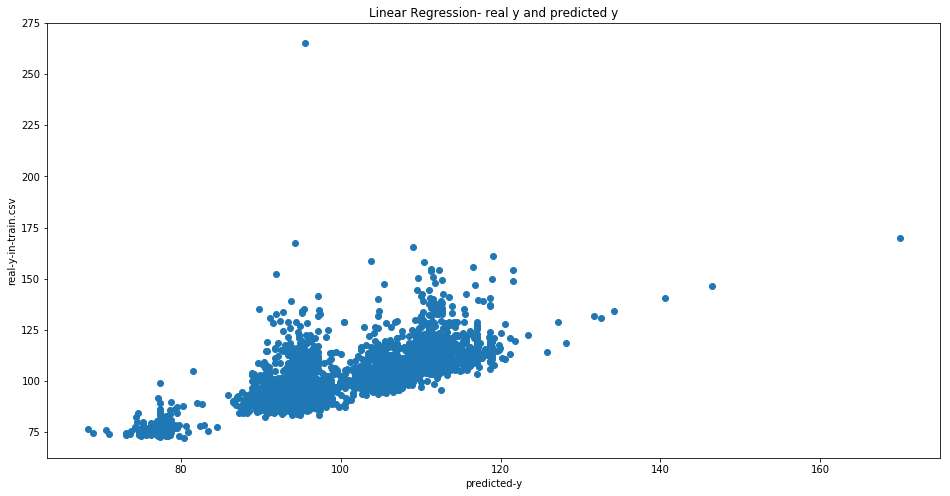

In [138]:
# 트레인데이터셋 실제y레이블과 예측y레이블의 그래프로 나타내기
# predicted_ylabel_from_train_x: 예측 y라벨
predicted_ylabel_from_train_x =model.predict(X_train)

plt.figure(figsize=(16,8))
plt.scatter(predicted_ylabel_from_train_x, trny )
plt.xlabel('predicted-y')
plt.ylabel('real-y-in-train.csv')
plt.title('Linear Regression- real y and predicted y')

In [139]:
print('훈련 세트 점수: {:.2f}'.format(linear_model.score(X_train, y_train)))

훈련 세트 점수: 0.59


## 테스트 데이터셋

훈련모델로 테스트 데이터셋 을 입력으로 예측된 y 레이블 얻기..


In [140]:
X_test= df_test.loc[:,'X10': ]
X_test.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [142]:
# 전체 데이터셋을 훈련시키기..
y_test = linear_model.predict(X_test)

In [143]:
# test데이터셋 id추출
ids=df_test.loc[:,'ID']
ids.head()

0    1
1    2
2    3
3    4
4    5
Name: ID, dtype: int64

In [144]:
trial_result= pd.DataFrame({'ID':ids, 'y': y_test}, columns=['ID', 'y'])
trial_result.head()

,ID,y
0,1,-4.928792e+12
1,2,2.266104e+13
2,3,1.085195e+02
3,4,7.762891e+01
4,5,1.100781e+02


In [165]:
# 음수라면.. 양수로 변환..
trial_result[trial_result.['y']<0]


SyntaxError: invalid syntax (<ipython-input-165-94b15cf70571>, line 2)

In [63]:
trial_result.to_csv('./result1.csv', sep=',',index=False )
#csv형식으로, 이름을 result1으로 trial_result 데이터 프레임을 저장...
#앞의 인덱스 없앤다.. 맨첫번째컬럼이 먼저 오게끔함..

그러나 캐글에 결과파일을 제출했으나 좋지못한 결과를 얻었다..

----


# 리지 회귀



# statsmodels 패키지를 사용한 선형 회귀 분석

- [참고 url1] 

https://www.kaggle.com/chocozzz/house-price-prediction-eda-updated-2019-03-12


- [참고 url2]

https://datascienceschool.net/view-notebook/58269d7f52bd49879965cdc4721da42d/


In [73]:
import statsmodels.api as sm

In [89]:
# 훈련 모델 만들기
model= sm.OLS(trny,trnx )
result=model.fit() #훈련모델 실행

# 실행결과
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     22.60
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:32:19   Log-Likelihood:                -14791.
No. Observations:                4209   AIC:                         3.009e+04
Df Residuals:                    3957   BIC:                         3.169e+04
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X10            5.2312      4.403      1.188      0.2

In [101]:
# 예측을 할 때 입력 데이터가 추정모형과 동일한 형태가 되어야한다.
x_new = trnx.mean().values
x_new #x_new.shape = (368,) = 368(trnx의 컬럼개수, X10~X385) => 벡터

array([1.33048230e-02, 0.00000000e+00, 7.50772155e-02, 5.79710145e-02,
       4.28130197e-01, 4.75172250e-04, 2.61344737e-03, 7.60275600e-03,
       7.84034212e-03, 9.95485864e-02, 1.42789261e-01, 2.61344737e-03,
       8.69565217e-02, 2.06699929e-02, 1.90068900e-03, 4.98930862e-03,
       6.82584937e-01, 3.25492991e-02, 4.30030886e-02, 4.51413637e-03,
       2.32359230e-01, 1.11665479e-02, 2.37586125e-04, 5.46448087e-03,
       2.32359230e-01, 4.51413637e-03, 2.32359230e-01, 3.32620575e-02,
       2.37586125e-04, 7.12758375e-04, 1.14041340e-02, 2.37586125e-04,
       7.22261820e-02, 1.14041340e-02, 2.53266809e-01, 5.97291518e-01,
       1.28296507e-02, 2.23330957e-02, 1.22119268e-01, 2.14065099e-01,
       7.21786648e-01, 4.22903302e-02, 6.88999762e-03, 4.34782609e-02,
       5.22689475e-03, 2.11451651e-02, 1.33048230e-02, 5.74958422e-01,
       7.12758375e-04, 1.42551675e-03, 9.53908292e-01, 5.93965312e-03,
       1.14041340e-02, 3.75148491e-01, 2.13827512e-03, 2.70848182e-02,
      

In [100]:
trnx.columns

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [109]:
dfx_new= sm.add_constant( pd.DataFrame( np.array(x_new)[:, np.newaxis].T,
                        columns=trnx.columns), has_constant='add')

dfx_new=dfx_new.drop('const', axis=1)
dfx_new

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.013305,0.0,0.075077,0.057971,0.42813,0.000475,0.002613,0.007603,0.00784,0.099549,...,0.318841,0.057258,0.314802,0.02067,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426


In [110]:
result.predict(dfx_new)

0    100.669318
dtype: float64

검색하다가 한번 적용해봤는데... 그냥 따라해보는 정도로만 했다.

---

# Gradient Boosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
X_train, y_train = df_train.loc[:, 'X10':] ,df_train.loc[:, 'y']

X_test=df_test.loc[:,'X10':]

In [124]:
#훈련모델 만들기
gbrt= GradientBoostingClassifier(random_state=0, max_depth=3).fit(X_train, y_train)
print('훈련 세트점수: {:.3f}'.format(logreg.score(X_train, y_train)))

ValueError: Unknown label type: 'continuous'